# Customer Retention Analysis: Telco Churn Dataset
## Understanding customer behavior and identifying churn drivers for a telecommunications company

---

##  Notebook 05: Insights and Recommendations
This notebook translates findings from the exploratory data analysis and modeling into actionable business insights and recommendations aimed at reducing customer churn. We identify the key drivers influencing churn and outline data-driven strategies to improve customer retention and long-term loyalty.

---

##  Insights & Recommendations: Table of Contents
- [5.0 Churn Drivers & Insights](#50-churn-drivers--insights)
- [5.1 Contract & Billing-Related Drivers](#51-contract--billing-related-drivers)
- [5.2 Financial & Loyalty Drivers](#52-financial--loyalty-drivers)
- [5.3 Internet Service Drivers](#53-internet-service-drivers)
- [5.4 Key Churn Drivers Summary](#54-key-churn-drivers-summary)
- [5.5 Recommendations](#55-recommendations)


In [1]:
# Setup path
from setup_paths import add_project_root
add_project_root()

In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.features import get_eda_only_features, get_target
from src.plot_style import TITLE_FONT_SIZE, TITLE_FONT_WEIGHT

In [3]:
# Load Data
df = pd.read_csv('../data/cleaned/telco_churn_clean.csv', index_col='customer_id')

##  5.0 Churn Drivers & Insights <a class="anchor" id="50-churn-drivers--insights"></a>

Exploring the Telco dataset has revealed key insights into customer behavior, service usage, contract types, payment methods, financial engagement, and tenure. This section consolidates findings from the exploratory data analysis and the predictive modeling to identify the primary factors contributing to customer churn.

By combining data-driven patterns with model interpretability, we can pinpoint where retention risk is most concentrated and which factors are actionable for targeted interventions.

**Key Churn Drivers:**

1. Internet Service Type

    - Customers with Fiber optic service exhibit the highest churn probability, while DSL and customers without internet service tend to be more stable.

    - The Logistic Regression model and SHAP analysis confirm that internet service type is one of the most influential predictors of churn.

2. Contract Type and Tenure

    - Month-to-month contracts significantly increase churn risk, whereas longer-term contracts and greater tenure reduce it.

    - These patterns are consistent across both exploratory analysis and model SHAP values, highlighting contract characteristics as actionable levers for retention.

3. Financial Engagement

    - High monthly charges are associated with elevated churn probability, particularly for customers on month-to-month plans.

    - Total charges per service provides additional predictive signals, confirmed by model feature importance.

4. Service Add-Ons

    - Customers without online security, tech support, or other protective add-ons are more likely to churn.

    - SHAP values indicate that these service features meaningfully influence model predictions, aligning with observed trends from the exploratory analysis.

5. Threshold Optimization Insights

    - Adjusting the probability threshold of the Logistic Regression model improved its practical performance for retention campaigns.

    - This ensures that high-risk customers are correctly prioritized while minimizing false positives, allowing for efficient allocation of retention efforts.

In [4]:
# Convert data to numeric/boolean values
df_numeric = pd.get_dummies(df.drop(get_eda_only_features(), axis=1), drop_first=True)
df_numeric.head()

,senior_citizen,tenure,monthly_charges,total_charges,new_customer,long_term_customer,num_services,total_charges_per_service,monthly_charges_per_service,gender_Male,...,contract_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,churn_Yes,has_streaming_Yes,has_internet_Yes,paperless_and_monthly_Yes,automatic_payments_Yes
customer_id,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,1,0,2,9.95,9.95,False,...,False,True,False,True,False,False,False,True,True,False
5575-GNVDE,0,34,56.95,1889.50,0,0,4,377.90,11.39,True,...,False,False,False,False,True,False,False,True,False,False
3668-QPYBK,0,2,53.85,108.15,1,0,4,21.63,10.77,True,...,False,True,False,False,True,True,False,True,False,False
7795-CFOCW,0,45,42.30,1840.75,0,0,4,368.15,8.46,True,...,False,False,False,False,False,False,False,True,False,True
9237-HQITU,0,2,70.70,151.65,1,0,2,50.55,23.57,False,...,False,True,False,True,False,True,False,True,True,False


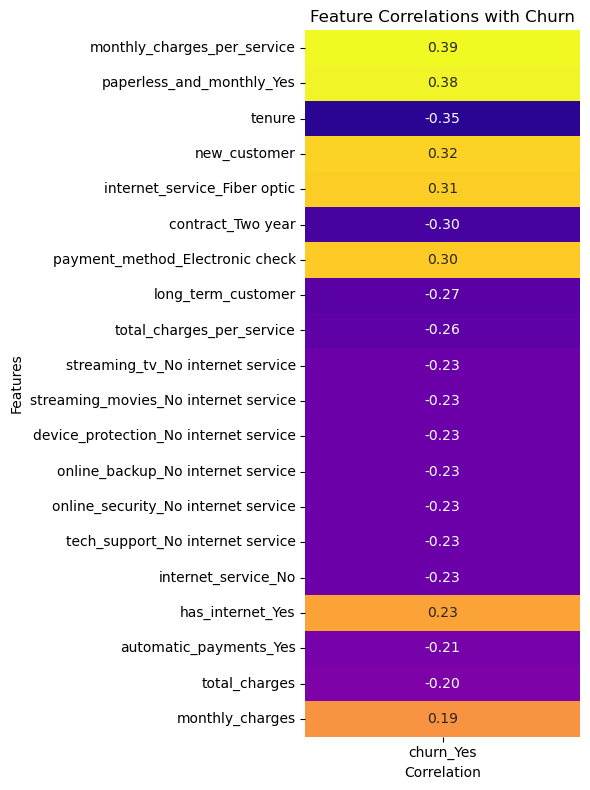

In [5]:
corr = df_numeric.corr(numeric_only=True) # Create correlation matrix of endoced numerical data

# Sort correlations with churn, exclude the target itself
target_corr = corr['churn_Yes'].sort_values(key=abs, ascending=False)

# Filter list to top features correlated with churn
top_corr = target_corr.drop('churn_Yes').head(20)

# Visualize top correlations
plt.figure(figsize=(6, 8))
sns.heatmap(
    top_corr.to_frame(),
    annot=True, cmap='plasma', center=0,
    cbar=False, fmt=".2f"
)
plt.title('Feature Correlations with Churn')
plt.ylabel('Features')
plt.xlabel('Correlation')

plt.tight_layout()
plt.show()

**Observations:** Features such as monthly charges per service, tenure, paperless billing and monthly contracts, as well as Fiber Optic internet service and whether the customer is new show the strongest correlation with churn. This suggests that customer engagement and service commitment play key roles in retention, and that high monthly charges may be driving away customers. 

## 5.1 Contract & Billing-Related Drivers <a class="anchor" id="51-contract--billing-related-drivers"></a>

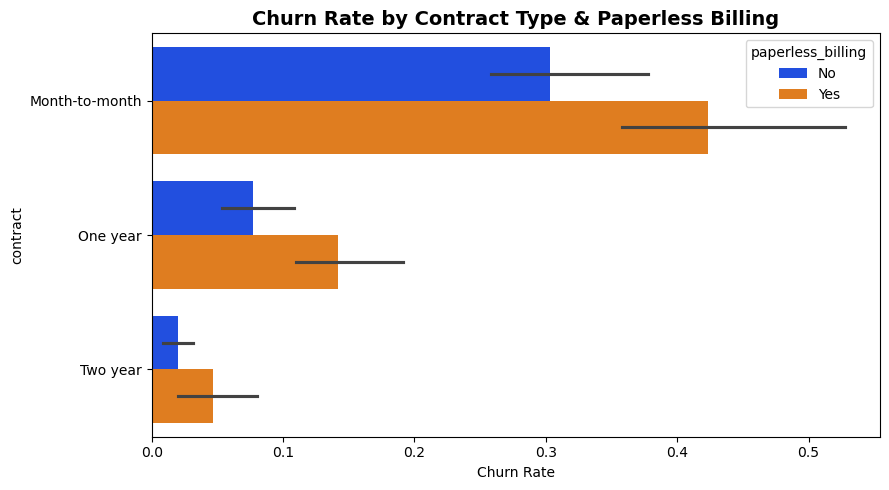

In [6]:
# Compute churn rates by key categorical features
categorical_features =['contract', 'payment_method', 'paperless_billing']
churn_rates = (
    df.groupby(categorical_features)['churn']
    .value_counts(normalize=True)
    .rename('rate')
    .reset_index()
)

# Focus only on churned rates
churn_summary = churn_rates[churn_rates['churn'] == 'Yes']

# Visualize churn by key features
plt.figure(figsize=(9, 5))
sns.barplot(
    data=churn_summary,
    x='rate',
    y='contract',
    hue='paperless_billing',
    orient='h',
    palette='bright'
)
plt.title('Churn Rate by Contract Type & Paperless Billing', fontsize=TITLE_FONT_SIZE, fontweight=TITLE_FONT_WEIGHT)
plt.xlabel('Churn Rate')

plt.tight_layout()
plt.show()


**Observations:** Contract length, billing method, and payment type are highly influential churn drivers.
Customers with month-to-month contracts show churn rates exceeding 40%, compared to less than 10% among
those with one- or two-year contracts. Paperless billing and electronic payment methods are also associated
with higher churn rates, suggesting that customers opting for convenience-oriented digital services may
exhibit lower commitment or stronger price sensitivity.


## 5.2 Financial & Loyalty Drivers <a class="anchor" id="52-financial--loyalty-drivers"></a>

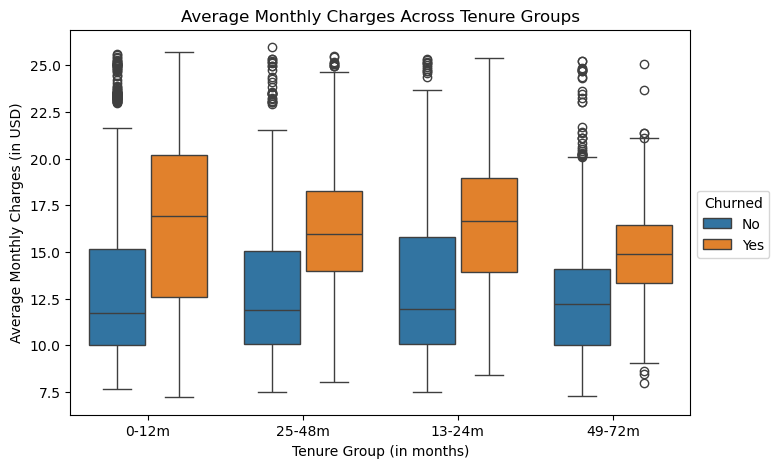

In [7]:
# Plot average monthly charges by tenure groups
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='tenure_group', y='monthly_charges_per_service', hue='churn', gap=0.1)
plt.title('Average Monthly Charges Across Tenure Groups')
plt.xlabel('Tenure Group (in months)')
plt.ylabel('Average Monthly Charges (in USD)')
plt.legend(title='Churned',bbox_to_anchor=(1.0, 0.6))

plt.show()

**Observations:** Long-term customers tend to have slightly higher monthly charges, reflecting either service upgrades or stable subscription patterns over time. However, the overlap across groups suggests that spending alone is not a clear predictor of loyalty. Additionally, at all tenure groups, customer retention was associated with lower average monthly charges.

Higher average monthly charges are a reasonably strong predictor on thier own, but when considered in conjunction with newer customers, high charges correspond with greater churn likelihood - suggesting that price sensitivity is strongest early in the customer lifecycle.

## 5.3 Internet Service Drivers  <a class="anchor" id="53-internet-service-drivers"></a>

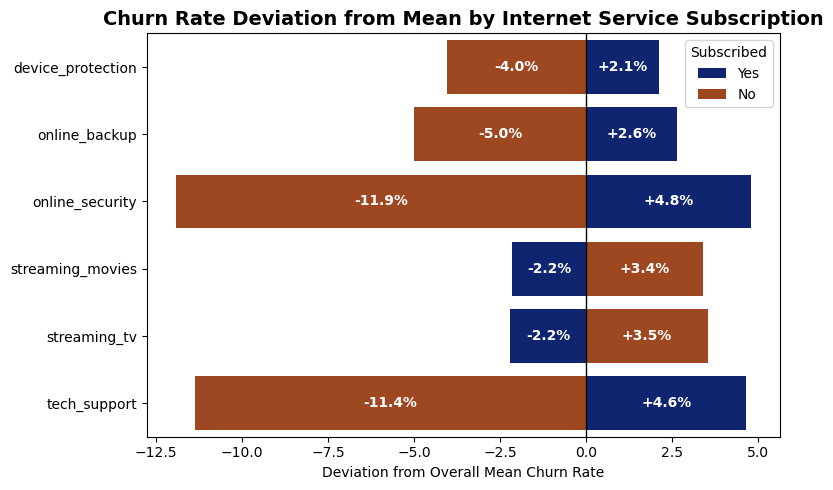

In [8]:
# Compute churn rates per service
internet_services = ['online_security_Yes', 'online_backup_Yes', 'device_protection_Yes', 'tech_support_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes']

service_churn = (
    df_numeric.melt(id_vars='churn_Yes', value_vars=internet_services, var_name='Service', value_name='Subscribed')
    .groupby(['Service', 'Subscribed'])['churn_Yes'].mean()
    .reset_index()
)

# Remove trailing '_Yes' to improve service name clarity
service_churn['Service'] = service_churn['Service'].apply(lambda x: x[:-4])

# Compute deviations from the overall mean, calculate percentages
mean_churn = df_numeric['churn_Yes'].mean()
service_churn['Deviation'] = service_churn['churn_Yes'] - mean_churn
service_churn['Deviation'] = service_churn['Deviation'] * 100

# Create label text for annotation
service_churn['Label'] = service_churn['Deviation'].apply(
    lambda x: f"{x:+.1f}%"  # e.g. +6.2% or -12.4%
)

# Visualize the deviation barplot
plt.figure(figsize=(8,5))
barplot = sns.barplot(
    data=service_churn,
    x='Deviation', y='Service', hue='Subscribed',
    dodge=False, 
    width=0.8,
    # Set different color palette to make Subscribed visually distinct from churn rate charts
    palette='dark'
)

# Add labels on bars
barplot.bar_label(barplot.containers[0], labels=service_churn['Label'].loc[0::2], fmt='', label_type='center', color='#FFFFFF', fontweight=TITLE_FONT_WEIGHT)
barplot.bar_label(barplot.containers[1], labels=service_churn['Label'].loc[1::2], fmt='', label_type='center', color='#FFFFFF', fontweight=TITLE_FONT_WEIGHT)

# Add zero-line
plt.axvline(0, color='black', linewidth=1)
plt.title('Churn Rate Deviation from Mean by Internet Service Subscription', fontsize=TITLE_FONT_SIZE, fontweight=TITLE_FONT_WEIGHT)
plt.xlabel('Deviation from Overall Mean Churn Rate')
plt.ylabel('')

# Change legend labels to be more readable
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(title='Subscribed', handles=handles, labels=('Yes', 'No'))

plt.tight_layout()
plt.show()

**Observations:** Device protection and online backup appear to help with customer retention, but not as significantly as online security and tech support. Streaming services' correlation with churn rate is quantified in this chart, and although this correlation requires attention, the actual churn rate difference is comparatively low. 

## 5.4 Key Churn Drivers Summary <a class="anchor" id="54-key-churn-drivers-summary"></a>

- **Contract length** remains the single most influential churn driver: customers with month-to-month plans are roughly 3× more likely to leave than those with annual contracts. SHAP analysis from the Logistic Regression model confirms that month-to-month contracts contribute strongly to higher predicted churn probabilities.

- **Tenure** strongly moderates churn risk: retention stabilizes after approximately 24 months. Longer-tenure customers consistently show lower SHAP contributions toward churn, aligning with observed EDA patterns.
- **Billing preferences** such as paperless billing and electronic payments correlate with higher churn, potentially reflecting less committed or more price-sensitive customers. The model identifies these features as moderately influential in predicting churn.
- **Service complexity and add-ons** (e.g., online security, tech support) generally reduce churn risk, consistent with greater customer engagement. SHAP values indicate these features meaningfully decrease predicted churn probabilities for individual customers. However, certain streaming services are associated with slightly higher churn, highlighting nuanced usage patterns.
- **Financial engagement** (monthly charges, total charges, average revenue) interacts with service and contract features to influence churn. Higher monthly charges are linked to elevated churn risk, particularly in newer customers who may be more cost-sensitive than long-term customers.

**Additional Modeling Insight:** Adjusting the classification threshold optimized the model’s potential performance, depending on the tradeoff in costs for failing to catch churn versus falsely predicting churn.

##  5.5 Recommendations <a class="anchor" id="55-recommendations"></a>
Based on the analysis of customer churn patterns in the Telco dataset, several actionable insights emerge that can help the company reduce churn and improve customer retention.

--- 

#### 1. **Target High-Risk Customer Segments**

**Key finding:** Customers on month-to-month contracts and those without paperless billing are at significantly higher risk of churn.

**Modeling insight:** SHAP analysis confirms that internet service, contract, and charges per service are among the most influential predictors of churn, making them strong levers for targeted interventions.

**Recommendation:**
- Encourage longer-term contracts through loyalty discounts, bundled offers, or early renewal incentives.

- Example: Offer a 5% monthly discount for customers switching from month-to-month to annual contracts.

#### 2. **Focus Retention Efforts on Early-Tenure Customers**

**Key finding:** Churn is highest among customers with tenure less than one year.

**Modeling insight:** Logistic Regression predictions and EDA both showed that short-tenure customers consistently have higher predicted churn probabilities.

**Recommendation:** 
- Develop a “first-year engagement program” including onboarding support, satisfaction surveys, or proactive service checks to strengthen early relationships.

#### 3. **Address Pain Points in Internet and Tech Support Services**

**Key finding:** Customers using Fiber Optic services and those without Tech Support have elevated churn.

**Modeling insight:** SHAP analysis highlights internet service type and tech support as top contributors to churn risk.

**Recommendation:** 
- Improve customer experience by providing clear setup guidance for fiber customers.

- Ensure easy access to tech support and consider proactive outreach for customers lacking these services.

#### 4. **Optimize Pricing and Billing Transparency**

**Key finding:** Higher monthly charges correlate with increased churn, particularly among customers with additional services (streaming, online security, etc.).

**Modeling insight:** Both exploratory analysis and SHAP contributions indicate that financial engagement interacts with service features to influence churn.

**Recommendation:** 

- Offer clearer billing breakdowns and flexible service packages to reduce perceived cost concerns.

- Consider targeted incentives for high-value but at-risk customers.

#### 5. **Leverage Predictive Monitoring (Future Opportunity)**

**Key finding:** The predictive model can accurately flag high-risk customers.

**Modeling insight:** Adjusting the classification threshold can be used to prioritize true positives or true negatives, depending on cost analysis.

**Recommendation:** 

- Implement a predictive monitoring system using Logistic Regression (or other high-performing models) to proactively identify churn risk.

- Use SHAP explanations to tailor retention strategies at the individual customer level, e.g., offering service add-ons or contract incentives to those most likely to leave.


#### **Summary**

Combining exploratory insights with model-driven interpretation allows Telco to:

- Target interventions at the customers most likely to churn

- Optimize retention program efficiency via threshold-tuned predictions

- Understand why customers are at risk using interpretable SHAP contributions

- Align actionable business decisions with data-driven evidence

> These recommendations provide a roadmap for personalized retention strategies and informed business planning.


- - - 

## 5.6 Business Impact Summary <a class="anchor" id="56-business-impact-summary"></a>

Exploratory analysis of the Telco dataset revealed key drivers of customer churn, spanning demographics, service usage, contracts, billing, and tenure.

**Primary churn drivers:**

- **Contract length:** Month-to-month customers are three times more likely to churn than long-term subscribers.

- **Tenure:** Early-stage customers (<24 months) face the highest churn risk, with retention stabilizing after two years.

- **Billing preferences:** Paperless billing and electronic payments correlate with higher churn, reflecting potential price sensitivity or lower engagement.

- **Service complexity and charges:** Customers using multiple services or paying higher total charges are modestly more loyal, though streaming services show slightly higher churn.

**Actionable insights:**

1. **Target high-risk segments** with loyalty programs or contract incentives to reduce early churn.

2. **Focus on first-year retention** via onboarding support, proactive engagement, and satisfaction monitoring.

3. **Enhance internet and tech support services** to improve customer experience, particularly for Fiber and tech support users.

5. **Optimize pricing and billing transparency** to reduce perceived cost concerns and improve perceived value.

5. **Leverage predictive monitoring** to proactively identify and retain at-risk customers.

**Projected business impact:** Implementing these strategies can reduce churn by 5-10% in high-risk segments, increase customer lifetime value, and improve overall customer satisfaction and service transparency.